In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from pathlib import Path

In [2]:
CURRENT_DIR = Path.cwd()

In [3]:
filepath = os.path.join(CURRENT_DIR, "S03_residual_stress_merge.xlsx")
dfm = pd.read_excel(filepath).rename(
    columns={"Sigma(x)": "sigma_x_pre", "FWHM": "FWHM_pre"}
)
dfm
dfm_imputed = dfm.copy()


In [4]:
default_cols = ["section", "sample_no", "location"]

In [5]:
dfm

,idx_excel_post,section,sample_no,location,R,W,D,sigma_x_post,FWHM_post,idx_excel_pre,sigma_x_pre,FWHM_pre,diff_sigma_x
0,4,AA5052,1,1,1400,60,10,13,2.55,2,-15,2.50,28
1,25,AA5052,2,1,1400,60,15,16,2.51,9,2,2.47,14
2,46,AA5052,3,1,1400,60,20,19,2.47,16,9,2.48,10
3,67,AA5052,4,1,1400,70,10,20,2.45,23,10,2.48,10
4,88,AA5052,5,1,1400,70,15,6,2.47,30,0,2.49,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1050,Center,50,7,1600,70,15,2,2.45,0,0,0.00,2
1131,1071,Center,51,7,1600,70,20,2,2.45,0,0,0.00,2
1132,1092,Center,52,7,1600,80,10,5,2.54,0,0,0.00,5
1133,1113,Center,53,7,1600,80,15,1,2.41,0,0,0.00,1


# Prototype


,section,sample_no,location,sigma_x_pre,idx_excel_pre
370,AA5052,46,3,-70,319
6,AA5052,7,1,-45,44
817,AA5052,7,6,-44,49
36,AA5052,37,1,-41,254
51,AA5052,52,1,-41,359


Imputing idx 370 at location 3, section AA5052 with mean value: -9.69811320754717


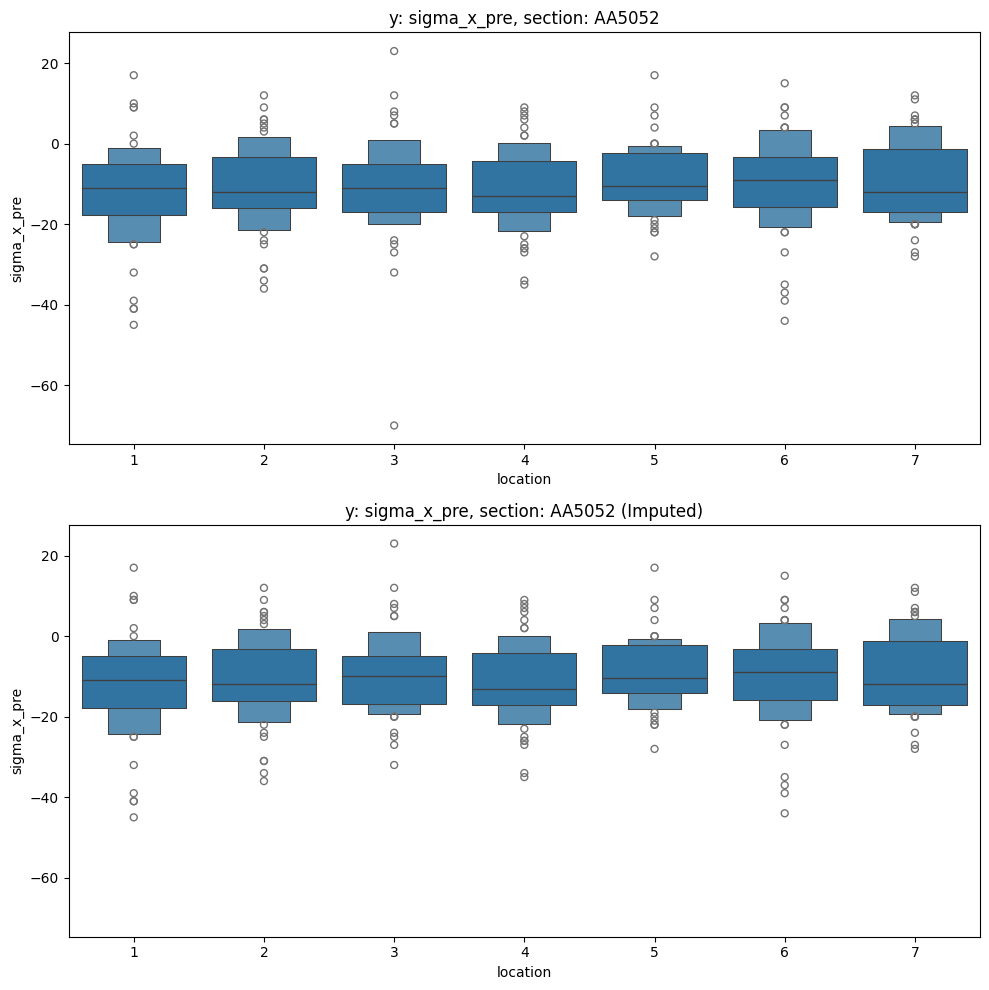

In [6]:
section = "AA5052"
y = "sigma_x_pre"
max_val = 150
min_val = -40
impute_idxs = [370]

# Filter data for specific section
filt = dfm["section"].isin([section])
idx_excel_col = "idx_excel_pre"

# Identify rows with high residual stress in pre-weld data for further investigation
filt_val = (dfm[y] > max_val) | (dfm[y] < min_val)
display(dfm[filt & filt_val][[*default_cols, y, idx_excel_col]].sort_values(by=y))

# Impute outlier values with median of respective location and section
for idx in impute_idxs:
    location = dfm.loc[idx, "location"]
    section = dfm.loc[idx, "section"]
    filt_idx = (
        (dfm["location"] == location)
        & (dfm["section"] == section)
        & (~dfm.index.isin(impute_idxs))
    )
    mean_val = dfm[filt_idx][y].mean()
    print(
        f"Imputing idx {idx} at location {location}, section {section} with mean value: {mean_val}"
    )
    dfm_imputed.loc[idx, y] = dfm[filt_idx][y].median()

# Plot boxenplot of pre-weld residual stress by location and section
filt = dfm["section"].isin([section])
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharey=True)
sns.boxenplot(dfm[filt], x="location", y=y, ax=ax[0])
ax[0].set_title(f"y: {y}, section: {section}")
sns.boxenplot(dfm_imputed[filt], x="location", y=y, ax=ax[1])
ax[1].set_title(f"y: {y}, section: {section} (Imputed)")
plt.tight_layout()
plt.show()

# Function


In [7]:
def outlier(section, y, max_val, min_val, impute_idxs):
    # section = "AA5052"
    # y = "sigma_x_pre"
    # max_val = 150
    # min_val = -40
    # impute_idxs = [370]

    # Filter data for specific section
    filt = dfm["section"].isin([section])
    idx_excel_col = "idx_excel_pre"

    # Identify rows with high residual stress in pre-weld data for further investigation
    filt_val = (dfm[y] > max_val) | (dfm[y] < min_val)
    display(dfm[filt & filt_val][[*default_cols, y, idx_excel_col]].sort_values(by=y))

    # Impute outlier values with median of respective location and section
    for idx in impute_idxs:
        location = dfm.loc[idx, "location"]
        section = dfm.loc[idx, "section"]
        filt_idx = (
            (dfm["location"] == location)
            & (dfm["section"] == section)
            & (~dfm.index.isin(impute_idxs))
        )
        mean_val = dfm[filt_idx][y].mean()
        print(
            f"Imputing idx {idx} at location {location}, section {section} with mean value: {mean_val}"
        )
        dfm_imputed.loc[idx, y] = dfm[filt_idx][y].median()

    # Plot boxenplot of pre-weld residual stress by location and section
    filt = dfm["section"].isin([section])
    fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharey=True)
    sns.boxenplot(dfm[filt], x="location", y=y, ax=ax[0])
    ax[0].set_title(f"y: {y}, section: {section}")
    sns.boxenplot(dfm_imputed[filt], x="location", y=y, ax=ax[1])
    ax[1].set_title(f"y: {y}, section: {section} (Imputed)")
    plt.tight_layout()
    plt.show()

# Outlier Removal and Imputation


,section,sample_no,location,sigma_x_pre,idx_excel_pre
370,AA5052,46,3,-70,319
6,AA5052,7,1,-45,44
817,AA5052,7,6,-44,49
36,AA5052,37,1,-41,254
51,AA5052,52,1,-41,359


Imputing idx 370 at location 3, section AA5052 with mean value: -9.69811320754717


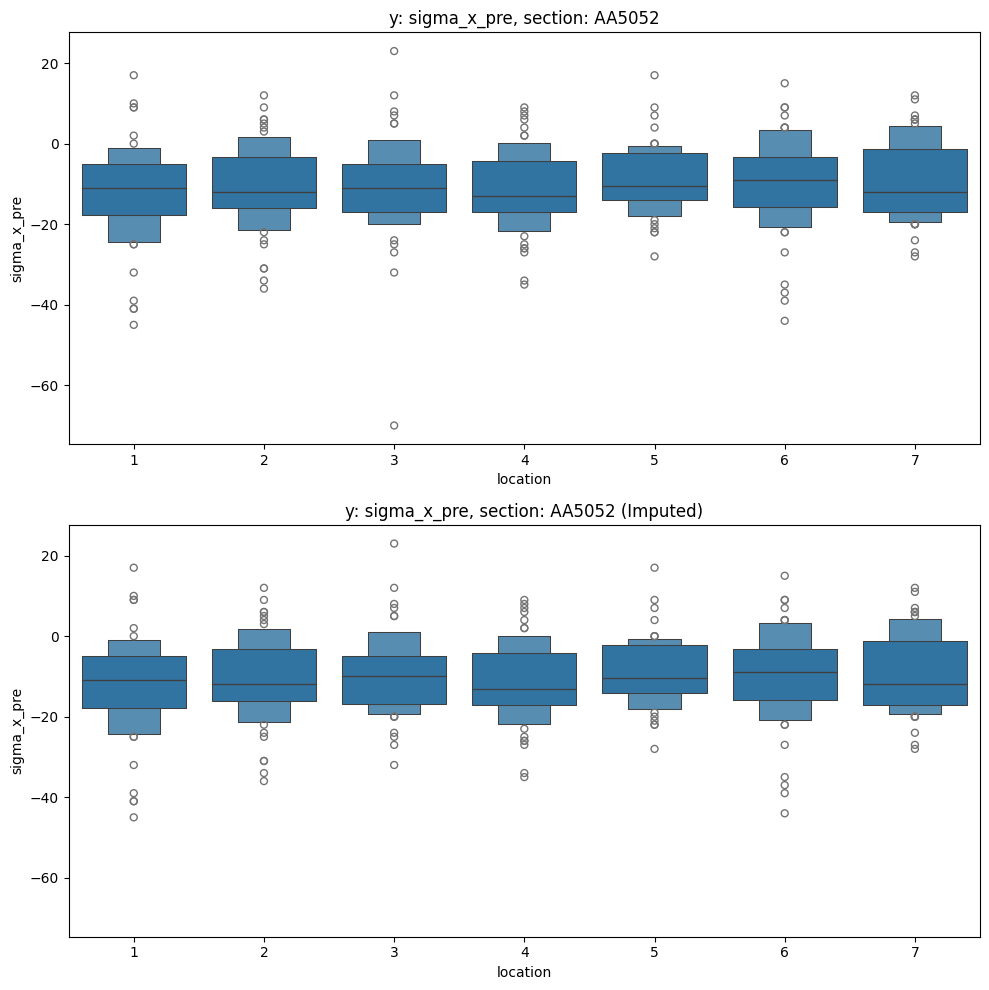

In [8]:
section = "AA5052"
y = "sigma_x_pre"
max_val = 150
min_val = -40
impute_idxs = [370]

outlier(section, y, max_val, min_val, impute_idxs)

,section,sample_no,location,sigma_x_pre,idx_excel_pre
745,AA6061,43,5,-109,300
554,AA6061,14,4,-92,96
227,AA6061,11,2,-85,73
747,AA6061,45,5,-83,314
217,AA6061,1,2,-79,3
392,AA6061,14,3,-78,95
875,AA6061,11,6,-77,77
566,AA6061,26,4,-76,180
723,AA6061,21,5,-73,146
270,AA6061,54,2,-72,374


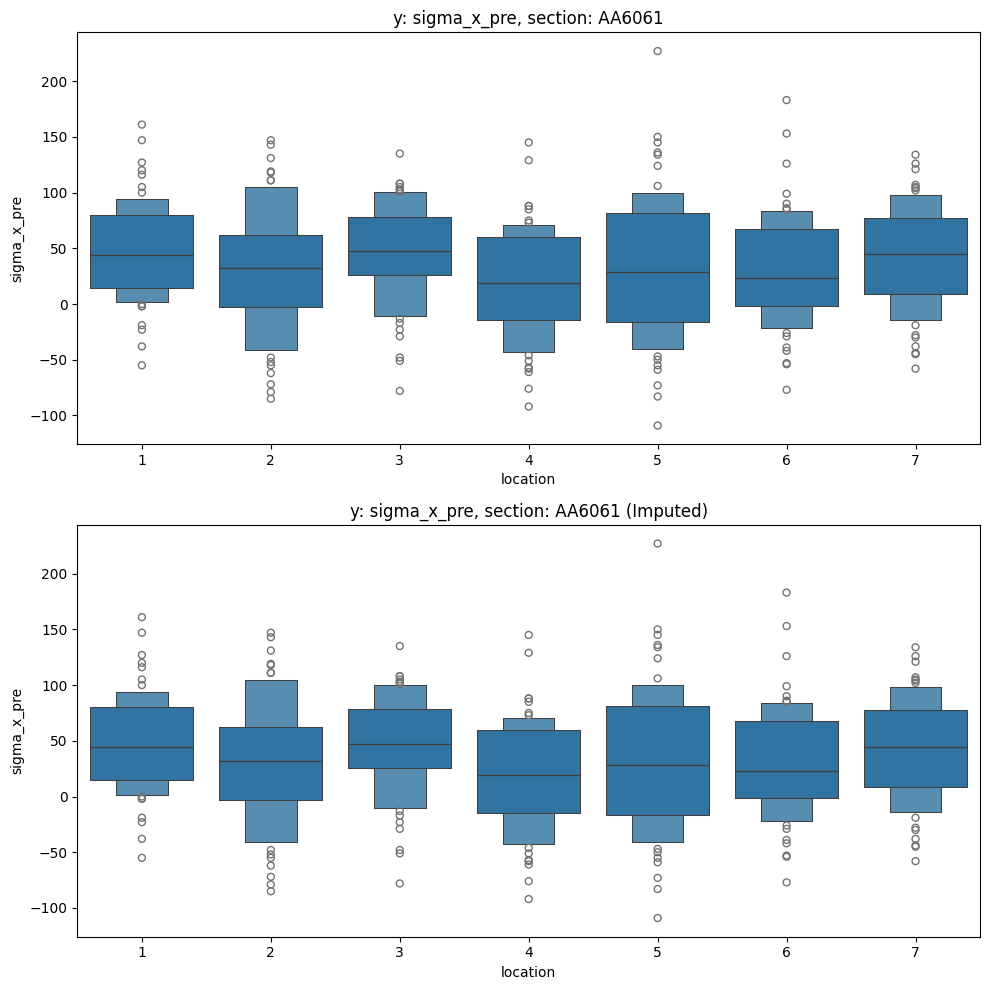

In [9]:
section = "AA6061"
y = "sigma_x_pre"
max_val = 150
min_val = -40
impute_idxs = []

outlier(section, y, max_val, min_val, impute_idxs)

,section,sample_no,location,sigma_x_post,idx_excel_pre


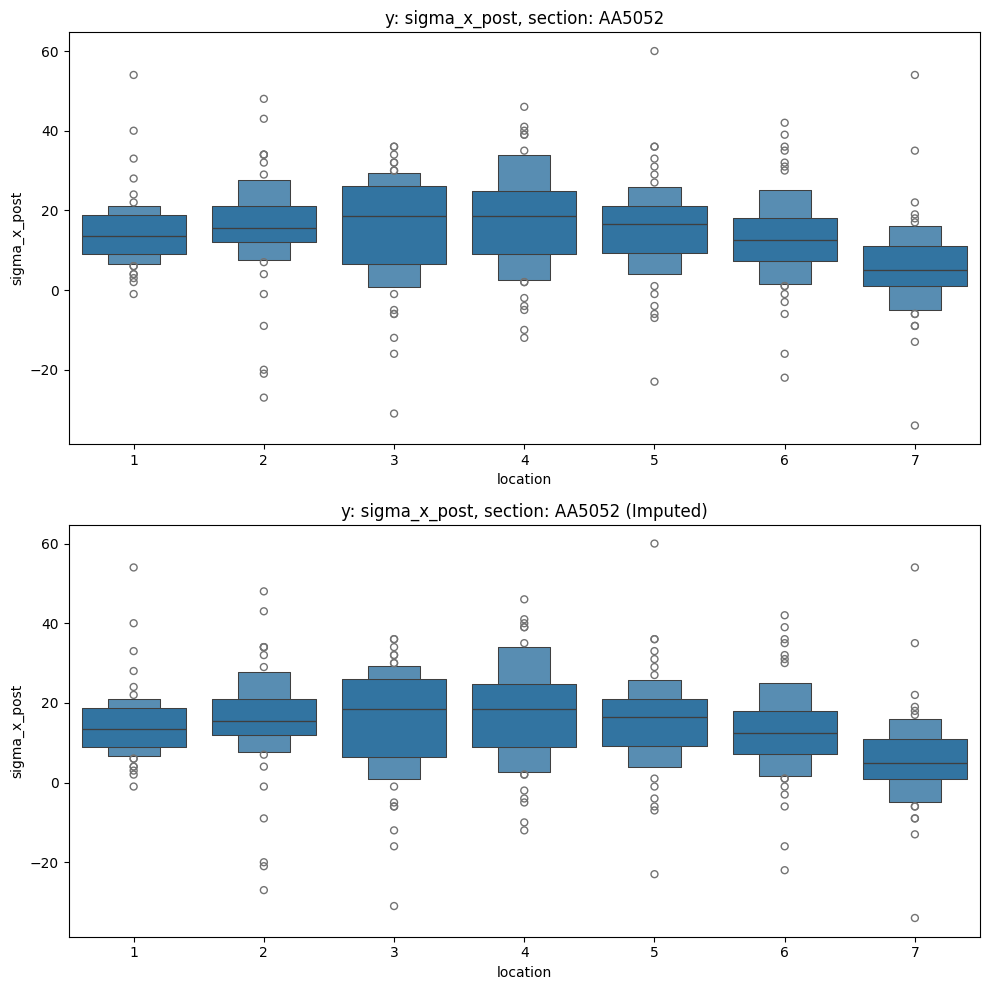

In [10]:
section = "AA5052"
y = "sigma_x_post"
max_val = 150
min_val = -40
impute_idxs = []

outlier(section, y, max_val, min_val, impute_idxs)

,section,sample_no,location,sigma_x_post,idx_excel_pre
1039,AA6061,13,7,-122,92
1027,AA6061,1,7,-90,8
417,AA6061,39,3,-56,270
1066,AA6061,40,7,-54,281
889,AA6061,25,6,-52,175
407,AA6061,29,3,-44,200
878,AA6061,14,6,-44,98
563,AA6061,23,4,-41,159


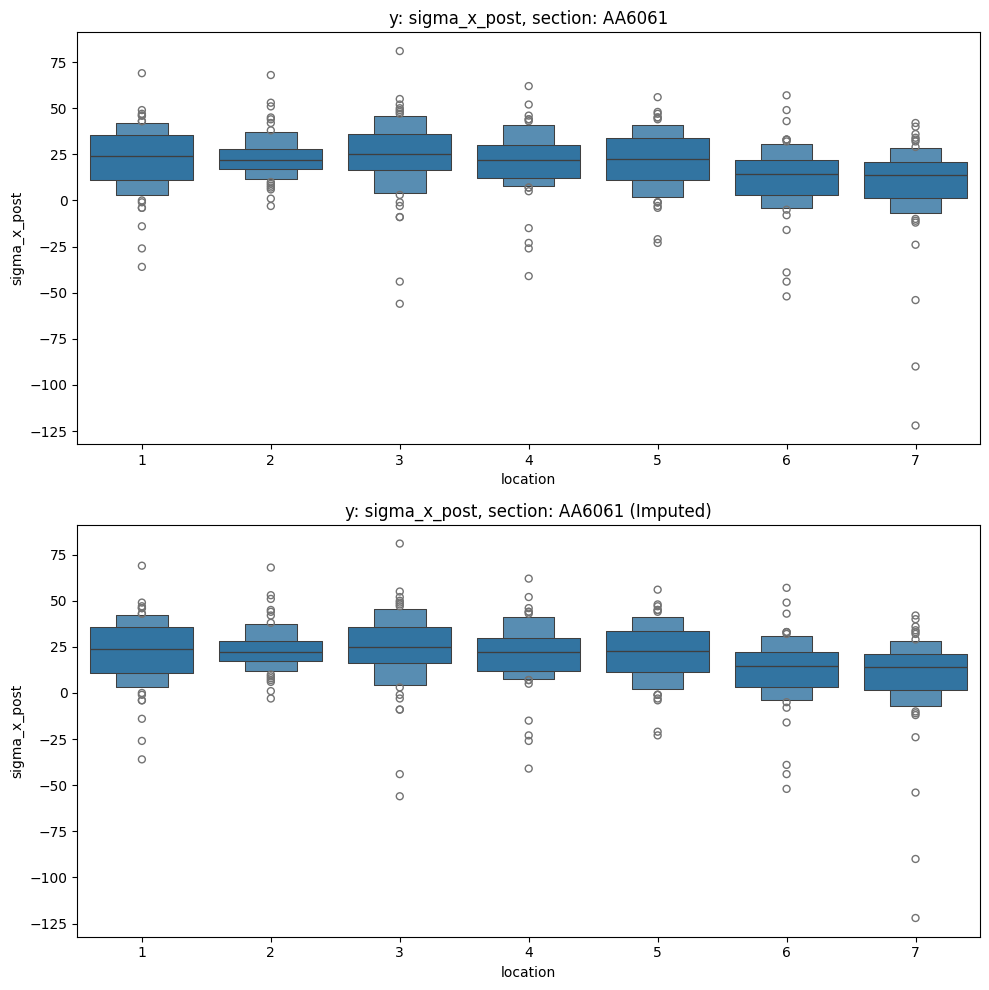

In [11]:
section = "AA6061"
y = "sigma_x_post"
max_val = 150
min_val = -40
impute_idxs = []

outlier(section, y, max_val, min_val, impute_idxs)

,section,sample_no,location,sigma_x_post,idx_excel_pre


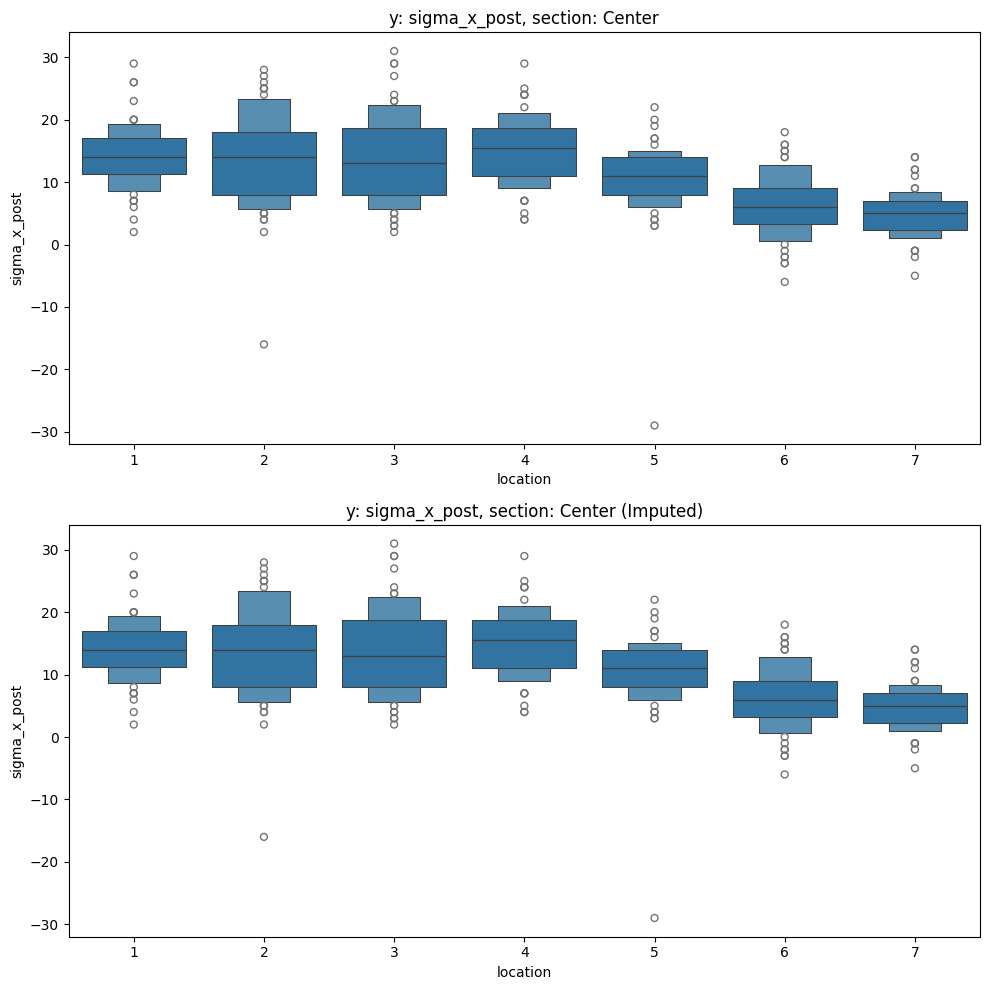

In [12]:
section = "Center"
y = "sigma_x_post"
max_val = 150
min_val = -40
impute_idxs = []

outlier(section, y, max_val, min_val, impute_idxs)

,section,sample_no,location,FWHM_pre,idx_excel_pre


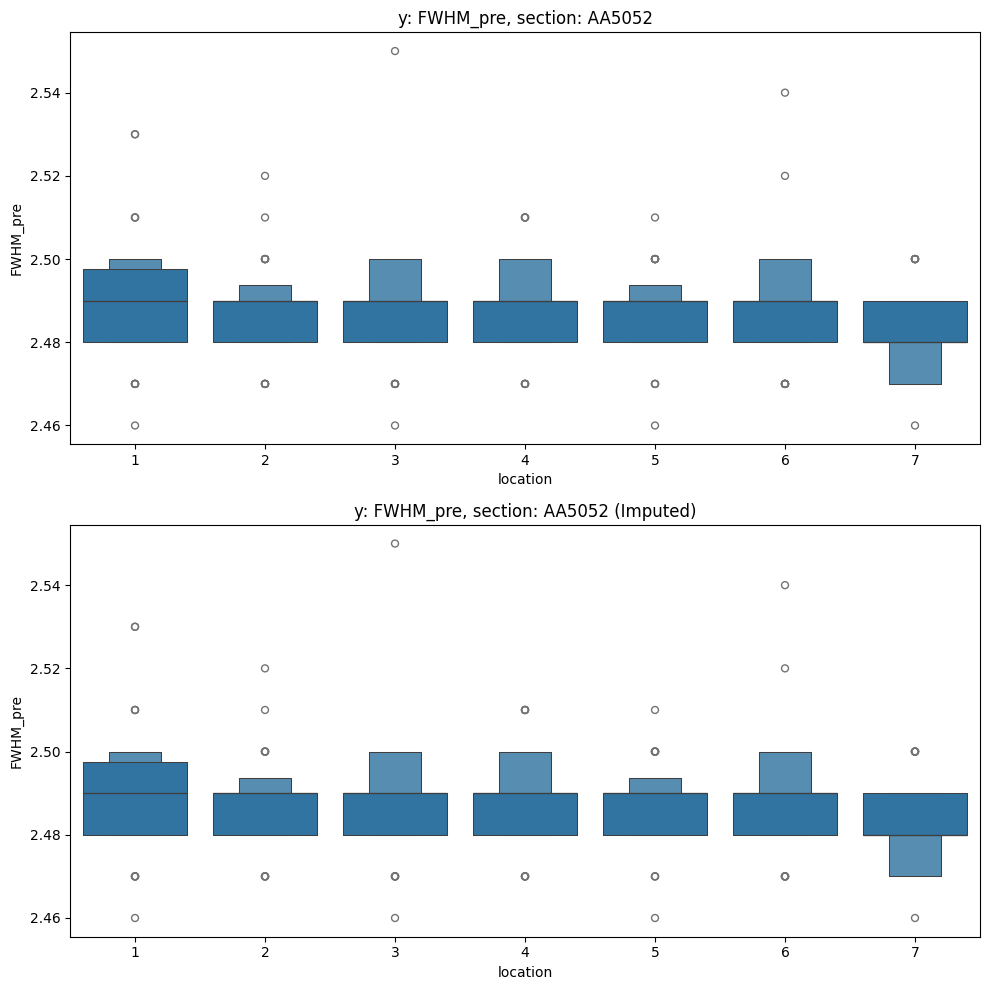

In [13]:
section = "AA5052"
y = "FWHM_pre"
max_val = 150
min_val = -40
impute_idxs = []

outlier(section, y, max_val, min_val, impute_idxs)

,section,sample_no,location,FWHM_pre,idx_excel_pre
101,AA6061,47,1,0.0,0


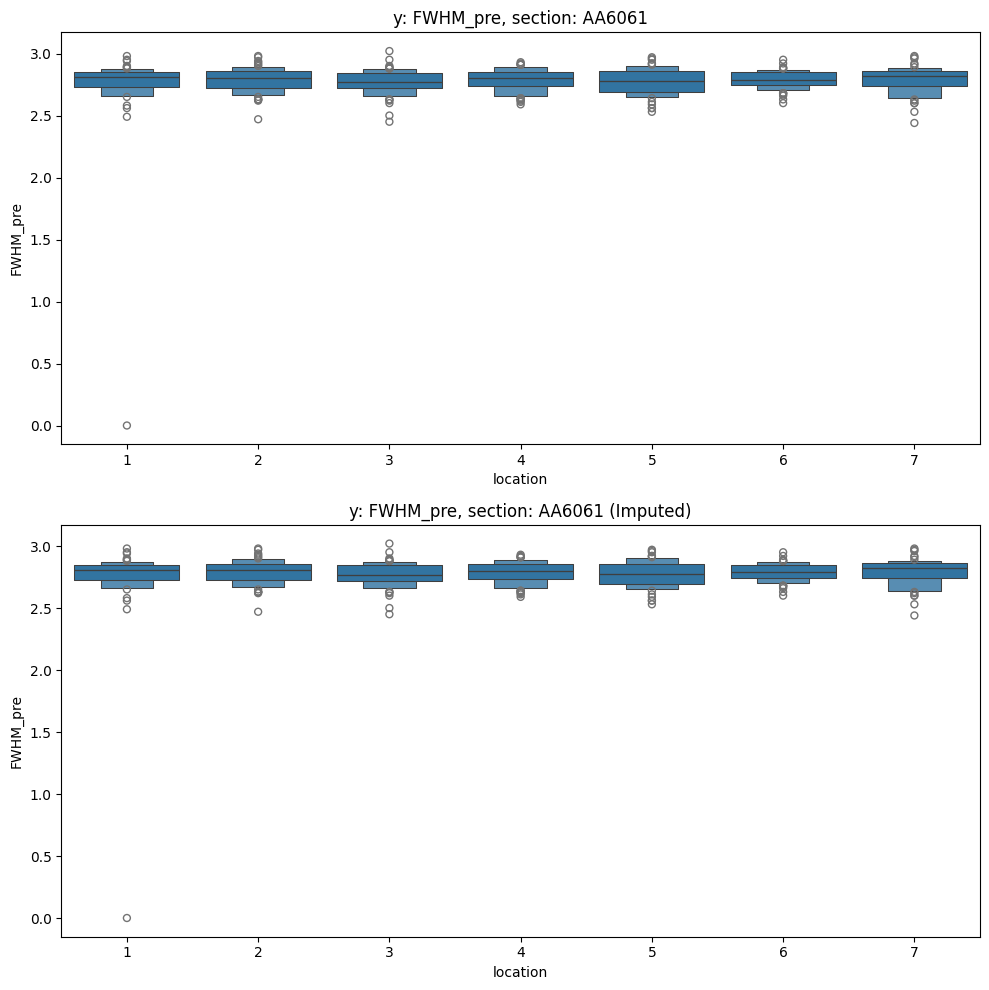

In [14]:
section = "AA6061"
y = "FWHM_pre"
max_val = 150
min_val = 1
impute_idxs = []

outlier(section, y, max_val, min_val, impute_idxs)

,section,sample_no,location,FWHM_post,idx_excel_pre


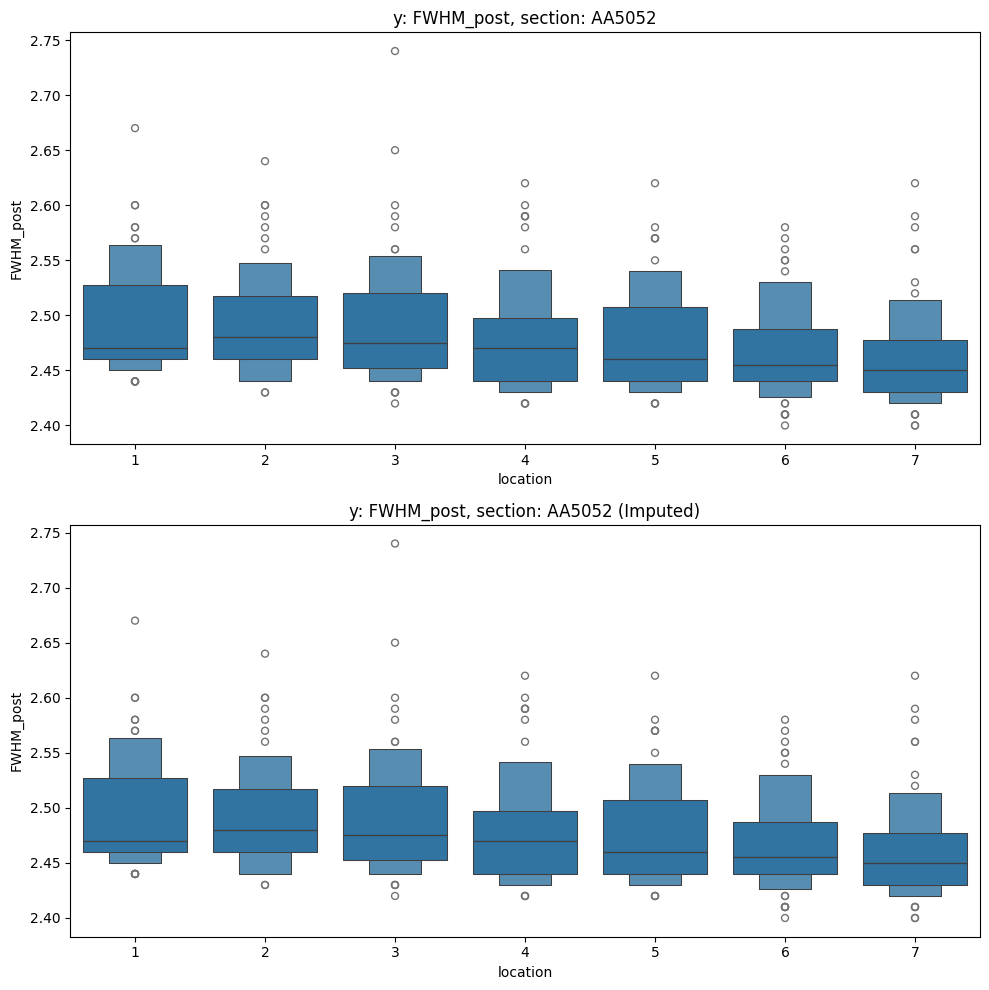

In [15]:
section = "AA5052"
y = "FWHM_post"
max_val = 150
min_val = 1
impute_idxs = []

outlier(section, y, max_val, min_val, impute_idxs)

,section,sample_no,location,FWHM_post,idx_excel_pre
100,AA6061,47,1,0.0,324


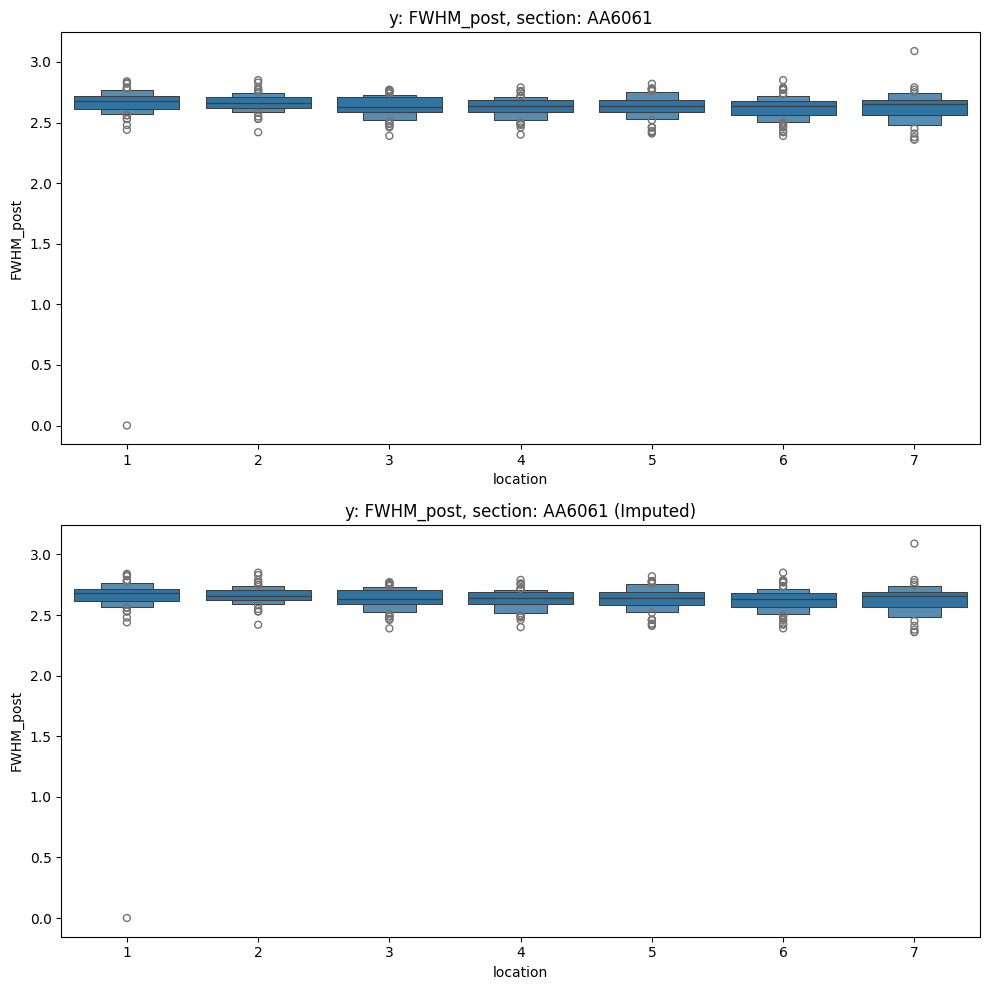

In [16]:
section = "AA6061"
y = "FWHM_post"
max_val = 150
min_val = 1
impute_idxs = []

outlier(section, y, max_val, min_val, impute_idxs)

,section,sample_no,location,FWHM_post,idx_excel_pre


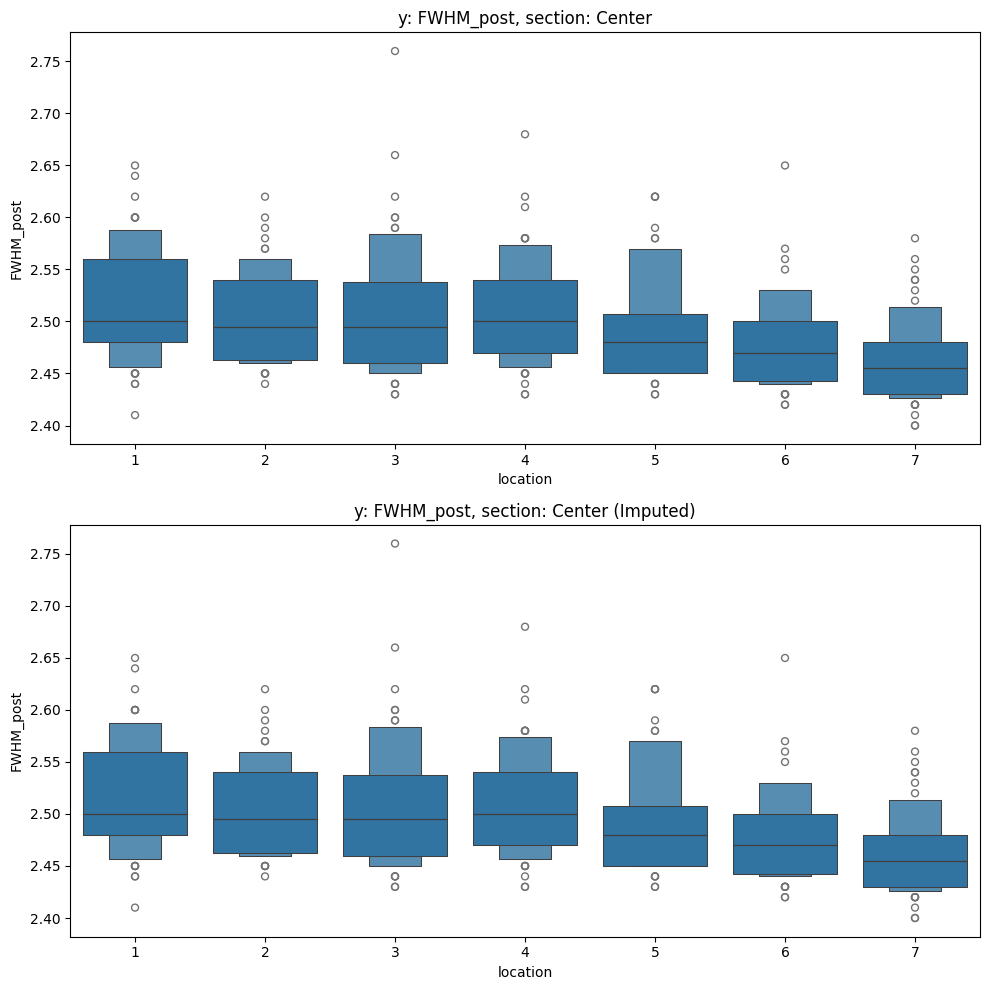

In [17]:
section = "Center"
y = "FWHM_post"
max_val = 150
min_val = 1
impute_idxs = []

outlier(section, y, max_val, min_val, impute_idxs)

In [18]:
dfm_imputed.to_excel("S04_residual_stress_imputed.xlsx", index=False)